In [1]:
conda install -c conda -forge/label/cf202003 pandas-profiling


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py install [-h] [--revision REVISION]
                               [-n ENVIRONMENT | -p PATH] [-c CHANNEL]
                               [--use-local] [--override-channels]
                               [--repodata-fn REPODATA_FNS]
                               [--strict-channel-priority]
                               [--no-channel-priority]
                               [--no-deps | --only-deps] [--no-pin] [--copy]
                               [--no-shortcuts] [-C] [-k] [--offline] [-d]
                               [--json] [-q] [-v] [-y] [--download-only]
                               [--show-channel-urls] [--file FILE]
                               [--force-reinstall]
                               [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                               [-m] [--clobber] [--dev]
                               [package_spec [package_spec ...]]
conda-script.py install: error: argument -f/--force: ignored 

In [2]:
# importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
#import plotly.express as px
import copy
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading of file into our notebook

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Tail
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
# Shape
df.shape

(145460, 23)

In [6]:
# Decribe

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# Checking for null values

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#ProfileReport(df)

In [10]:
# Setting date as index

weather = df.set_index('Date')
weather

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


N:B -- Decision Tree model can be used to train both Categorical values and Numerical values, But here we will be splitting it into Categorical and Numerical values

In [11]:
# Calling out the categorical values 

C_features = weather.select_dtypes(include = ['object']).copy()
C_features

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,Albury,W,W,WNW,No,No
2008-12-02,Albury,WNW,NNW,WSW,No,No
2008-12-03,Albury,WSW,W,WSW,No,No
2008-12-04,Albury,NE,SE,E,No,No
2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
2017-06-21,Uluru,E,SE,ENE,No,No
2017-06-22,Uluru,NNW,SE,N,No,No
2017-06-23,Uluru,N,SE,WNW,No,No


In [12]:
# Cheching the null values for Categorical values

C_features.isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [13]:
# Filling of the Categorical NaN values with the mode

cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in cols:
    mode_val = C_features[i].mode()[0]
    C_features[i].fillna(mode_val, inplace = True)

In [14]:
C_features

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,Albury,W,W,WNW,No,No
2008-12-02,Albury,WNW,NNW,WSW,No,No
2008-12-03,Albury,WSW,W,WSW,No,No
2008-12-04,Albury,NE,SE,E,No,No
2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
2017-06-21,Uluru,E,SE,ENE,No,No
2017-06-22,Uluru,NNW,SE,N,No,No
2017-06-23,Uluru,N,SE,WNW,No,No


In [15]:
# Checking the info, Here we can see we no longer have any null values
C_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Location      145460 non-null  object
 1   WindGustDir   145460 non-null  object
 2   WindDir9am    145460 non-null  object
 3   WindDir3pm    145460 non-null  object
 4   RainToday     145460 non-null  object
 5   RainTomorrow  145460 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [16]:
# Conversion of Categorical value to Numerical value using Label Encoder

from sklearn.preprocessing import LabelEncoder
le_Location = LabelEncoder()
le_WindGustDir = LabelEncoder()
le_WindDir9am = LabelEncoder()
le_WindDir3pm = LabelEncoder()
le_RainToday = LabelEncoder()
le_RainTomorrow = LabelEncoder()

In [17]:
C_features['Location_n'] = le_Location.fit_transform(C_features['Location'])
C_features['WindGustDir_n'] = le_WindGustDir.fit_transform(C_features['WindGustDir'])
C_features['WindDir9am_n'] = le_WindDir9am.fit_transform(C_features['WindDir9am'])
C_features['WindDir3pm_n'] = le_WindDir3pm.fit_transform(C_features['WindDir3pm'])
C_features['RainToday_n'] = le_RainToday.fit_transform(C_features['RainToday'])
C_features['RainTomorrow_n'] = le_RainTomorrow.fit_transform(C_features['RainTomorrow'])

In [18]:
#C_features

In [19]:
# Since we now have our C_features in numbers , we drop the one with strings 

new_C_features = C_features.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'],axis='columns')
new_C_features.head(10)

,Location_n,WindGustDir_n,WindDir9am_n,WindDir3pm_n,RainToday_n,RainTomorrow_n
Date,,,,,,
2008-12-01,2,13,13,14,0,0
2008-12-02,2,14,6,15,0,0
2008-12-03,2,15,13,15,0,0
2008-12-04,2,4,9,0,0,0
2008-12-05,2,13,1,7,0,0
2008-12-06,2,14,13,13,0,0
2008-12-07,2,13,12,13,0,0
2008-12-08,2,13,10,13,0,0
2008-12-09,2,6,9,7,0,1


<AxesSubplot:xlabel='RainTomorrow_n', ylabel='count'>

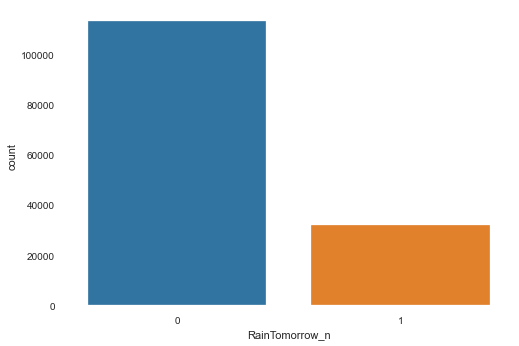

In [20]:
# Using of count plot to check the amount of time rain did not fall and the amount of time rain fell
sns.countplot(x = C_features['RainTomorrow_n'])

In [21]:
# Getting out our Numerical values

N_features = weather.select_dtypes(include = ['float64']).copy()
N_features.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
2008-12-06,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9
2008-12-07,14.3,25.0,0.0,NaN,NaN,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6
2008-12-08,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5
2008-12-09,9.7,31.9,0.0,NaN,NaN,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2


In [22]:
# Checking of the Numerical null values

N_features.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [23]:
# Here we check for the outlier


Ncols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
for i in Ncols:
    Q1 = weather[Ncols].quantile(0.25)
    Q3 = weather[Ncols].quantile(0.75)
    IQR = Q3 - Q1
print(IQR)

MinTemp           9.3
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
dtype: float64


In [24]:
(weather[Ncols] < (Q1 - 1.5 * IQR)) | (weather[Ncols] > (Q3 + 1.5 * IQR))

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,,
2008-12-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-12-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-06-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-06-23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
new_N_features = N_features[~((N_features < (Q1 - 1.5 * IQR)) | (N_features > (Q3 + 1.5 * IQR))).any(axis = 1)]
#new_N_features.shape

In [26]:
# Here we fill our Numerial NaN values with the mean 

for i in Ncols:
    mean_val = N_features[i].mean()
    N_features[i].fillna(mean_val, inplace = True)

In [27]:
N_features.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
2008-12-02,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2008-12-03,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
2008-12-04,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
2008-12-05,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
2008-12-06,14.6,29.7,0.2,5.468232,7.611178,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9
2008-12-07,14.3,25.0,0.0,5.468232,7.611178,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6
2008-12-08,7.7,26.7,0.0,5.468232,7.611178,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5
2008-12-09,9.7,31.9,0.0,5.468232,7.611178,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2


In [28]:
N_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
dtypes: float64(16)
memory usage: 22.9+ MB


In [29]:
weather.groupby('RainTomorrow').mean().T

RainTomorrow,No,Yes
MinTemp,11.897675,13.186890
MaxTemp,23.836247,21.119100
Rainfall,1.270290,6.142104
Evaporation,5.734807,4.527779
Sunshine,8.546358,4.471761
WindGustSpeed,38.288391,45.946764
WindSpeed9am,13.567314,15.508577
WindSpeed3pm,18.222804,20.078509
Humidity9am,66.217573,77.983314
Humidity3pm,46.510625,68.800019


In [30]:
# Here we concatenate our new categorical and Numerical value together 

new_weather = pd.concat([new_C_features, N_features], axis = 1)
#new_weather

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

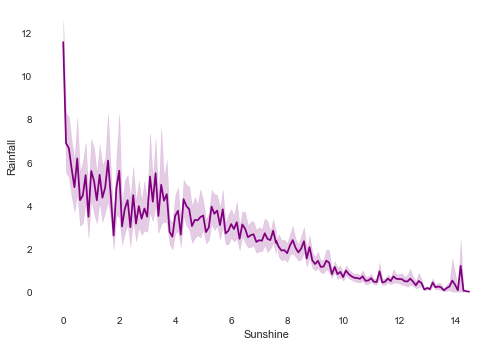

In [31]:
# Here is a line plot between th Sunshine and Rainfall

sns.lineplot(data = new_weather, x = 'Sunshine', y ='Rainfall', color = 'purple')

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

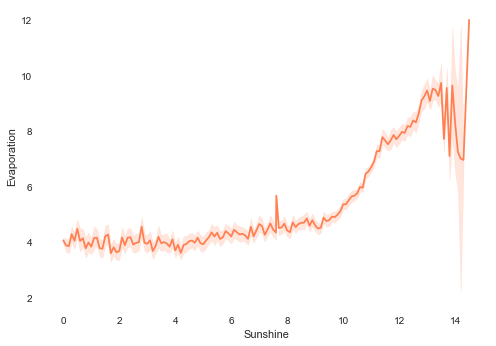

In [32]:
# Lineplot between Sunshine and Evaporation

sns.lineplot(data = new_weather, x = 'Sunshine', y ='Evaporation', color = 'coral')

<AxesSubplot:>

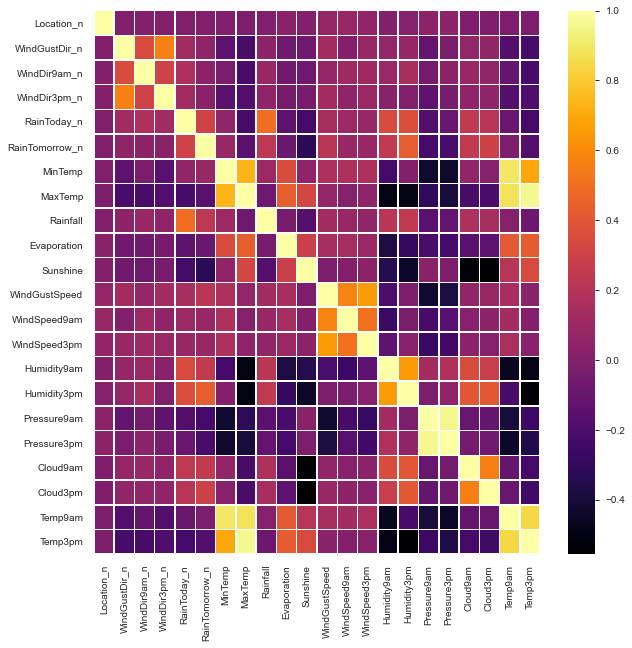

In [33]:
# Here we check for the corollation between the columns

plt.figure(figsize = (10, 10))
sns.heatmap(new_weather.corr(), linewidths = 0.5, annot = False, fmt = '.2f', cmap = 'inferno')

In [34]:
# Getting of our input

X = new_weather.drop(['RainTomorrow_n'], axis = 1)
#X

In [35]:
# Getting of our target

y = new_weather['RainTomorrow_n']
#y

In [36]:
# Splitting of our data set into training set and the testing set , we made 80% of our data set the training part and the remaining 20% the testing part

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [37]:
# We will be using Decision tree Classifier or our model

from sklearn.tree import DecisionTreeClassifier
Dmodel = DecisionTreeClassifier()

In [38]:
# Training of our model withn our training set using Decision tree Classifier

Dmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Here we let the system Predict our X_train for us

train_preds = Dmodel.predict(X_train)
train_preds

array([1, 0, 0, ..., 0, 0, 0])

In [40]:
y_train

Date
2017-04-24    1
2013-10-11    0
2012-02-18    0
2012-02-18    0
2011-10-11    0
             ..
2013-10-22    0
2015-05-29    0
2012-03-17    0
2014-06-23    0
2012-03-12    0
Name: RainTomorrow_n, Length: 116368, dtype: int32

Here looking at the first two columns we can see that our train predicted and our output(y_train) for the data set is the same , So, Our model has learned the data well

In [41]:
pd.value_counts(train_preds)

0    90920
1    25448
dtype: int64

In [42]:
y_predicted = Dmodel.predict(X_test)
#y_predicted

In [43]:
#y_test

So, now we are trying to Check our accuracy i.e if our model is doing great, So we import metrics from sklearn

In [44]:
from sklearn import metrics

In [45]:
# Checking of how good our trained model is

metrics.accuracy_score(train_preds, y_train)

0.9999226591502819

In [46]:
metrics.f1_score(train_preds, y_train)

0.9998232000785777

In [47]:
train_probs = Dmodel.predict_proba(X_train)
train_probs

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Now we have train all we want to from the data, Though we are having close to 100 percent on the training data but we cant reply on it cause our model will be training data it has not seen before. 
    Now, we use the dataset we have set aside to check if when our data set sees the data it has not seen before its going to work well.
    So, we check for the accuracy score of the test data set

In [48]:
Dmodel.score(X_test, y_test)

0.7836174893441495

In [49]:
test_probs = Dmodel.predict_proba(X_test)
test_probs

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [50]:
y_test.value_counts() / len(y_test)

0    0.779321
1    0.220679
Name: RainTomorrow_n, dtype: float64

OOPs! As we can see, we are having like 78% as the accuracy score for our test set,  It appears that our model is <b> Overfitting </b> , Since it is doing well with the training set but its not pretty well with the testing set

In [51]:
# Here we try to check whats going on in the tree , so we import plot_tree from sklearn to visualize our tree out for us.

In [52]:
from sklearn.tree import plot_tree, export_text

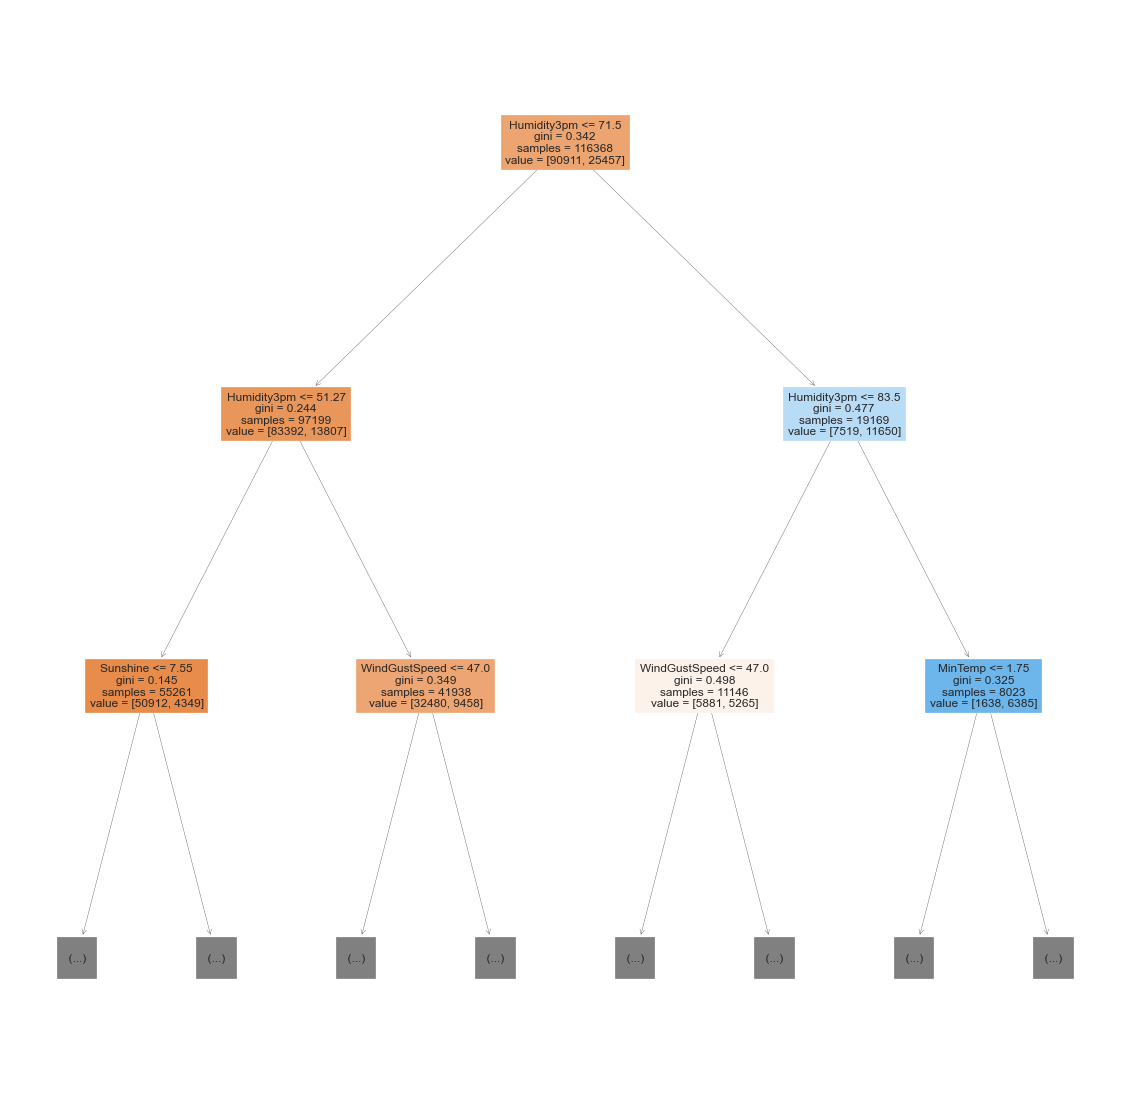

In [53]:
plt.figure(figsize = (20, 20))
plot_tree(Dmodel, feature_names = X_train.columns, max_depth = 2, filled = True)
plt.show()

The decision to be made is decided by the gini value , Every model has what they call loss function(Cost function) and the objective of the model is to minimize the cost, So this is done by the gini score . The gini score represent how good a certain split is , Lower gini score means lower Cost which is equivalent to Good split and vice versa

In [54]:
# max_depth of the tree

Dmodel.tree_.max_depth

39

In [55]:
Dmodel.feature_importances_

array([0.03752947, 0.02564473, 0.02679352, 0.02732229, 0.00215296,
       0.04844016, 0.0399837 , 0.04849307, 0.02599567, 0.04191531,
       0.06723102, 0.03315927, 0.03329999, 0.04533071, 0.26642473,
       0.04533982, 0.06780447, 0.01716646, 0.02128547, 0.04116064,
       0.03752657])

In [56]:
#X_train

In [57]:
importance_df = pd.DataFrame({
    'features' : X_train.columns,
    'importance' : Dmodel.feature_importances_
}).sort_values('importance', ascending = False)

In [58]:
importance_df.head(10)

,features,importance
14,Humidity3pm,0.266425
16,Pressure3pm,0.067804
10,WindGustSpeed,0.067231
7,Rainfall,0.048493
5,MinTemp,0.048440
15,Pressure9am,0.045340
13,Humidity9am,0.045331
9,Sunshine,0.041915
19,Temp9am,0.041161
6,MaxTemp,0.039984


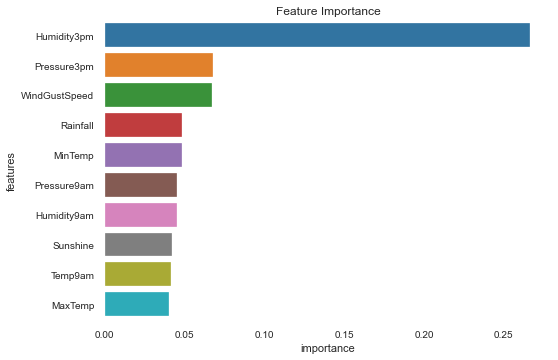

In [59]:
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x = 'importance', y = 'features');

Now we want to Regularize our Model

In [60]:
#?DecisionTreeClassifier

In [61]:
def max_depth_error(md):
    Dmodel = DecisionTreeClassifier(max_depth = md, random_state = 42)
    Dmodel.fit(X_train, y_train)
    train_error = 1 - Dmodel.score(X_train, y_train)
    val_error = 1- Dmodel.score(X_test, y_test)
    return{'Max Depth':  md,'Training Error': train_error, 'Validation Error ': val_error}

In [62]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 54.5 s


In [63]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.183263,0.187509
1,2,0.177970,0.181218
2,3,0.169162,0.174206
3,4,0.163043,0.169634
4,5,0.161006,0.167469
5,6,0.156443,0.165716
6,7,0.153161,0.162966
7,8,0.149216,0.162416
8,9,0.143605,0.161660
9,10,0.136103,0.162141


In [64]:
# Here we tune our max_depth hyper parameter

Dmodel = DecisionTreeClassifier(max_depth = 7, random_state = 42)

In [65]:
# Then train our model after setting the hyper parameter

Dmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [66]:
Dmodel.score(X_train, y_train)

0.8468393372748522

In [67]:
Dmodel.score(X_test, y_test)

0.8370342362161419

Now, we can now see that our model is ok , its doing well in both the training set and the testing set 

In [68]:
test_probs = Dmodel.predict_proba(X_test)
test_probs

array([[0.49915683, 0.50084317],
       [0.98585237, 0.01414763],
       [0.42247191, 0.57752809],
       ...,
       [0.87124242, 0.12875758],
       [0.75293586, 0.24706414],
       [0.64383562, 0.35616438]])

Lets just create a random data to check if rain will fall or not

In [69]:
new_data = pd.DataFrame({
    'Location_n'    : [2, 41, 2],  
    'WindGustDir_n' : [13, 14, 6],
    'WindDir9am_n'  : [2, 6, 9],
    'WindDir3pm_n'  : [7, 1, 7],
    'RainToday_n'   : [0, 1, 0],
    'MinTemp'       : [14.2, 13.0, 7.7],
    'MaxTemp'       : [6, 8, 26.7],
    'Rainfall'      : [0.2, 0.1, 0],
    'Evaporation'   : [6.888812, 4.26783, 5.46232],
    'Sunshine'      : [2.866132, 7.34789, 7.611178],
    'WindGustSpeed' : [1.88888, 4.98761, 80.0],
    'WindSpeed9am'  : [10.0, 40.0, 7.0],
    'WindSpeed3pm'  : [29.0, 48.9, 28.0],
    'Humidity9am'   : [11.6, 73.9, 42.0],
    'Humidity3pm'   : [3.0, 9.0, 9.0],
    'Pressure9am'   : [1119.7, 2222.1, 1008.9],
    'Pressure3pm'   : [4368.2, 1114.9, 1003.6],
    'Cloud9am'      : [2.7, 3.9, 4.447461],
    'Cloud3pm'      : [1.8, 5.6, 4.50993],
    'Temp9am'       : [6.9, 8.5, 18.3],
    'Temp3pm'       : [7.7, 4.9, 30.3],        

})

RainTomorrow = Dmodel.predict(new_data)
RainTomorrow

array([0, 0, 0])

In [70]:
PredictProbalility = Dmodel.predict_proba(new_data)
PredictProbalility

array([[0.95400184, 0.04599816],
       [0.95400184, 0.04599816],
       [0.82706767, 0.17293233]])